# Visualization of embedding spaces

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler
import configs

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'
%matplotlib inline
# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False


## Plotting function

In [3]:
def do_plot(X_fit, anchors, labels, title=None, other_anchors=None, extra_data=None, extra_labels=None,
show_centers=True, show_title=True, show_axis=True, show_legend=False, model_name=None, dataset=None, fig_format='png'):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    if num_labels >= 10:
        colors = cm.tab20(np.linspace(0, 1, num_labels))
    else:
        colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        plt.clf()
        plt.rcParams["figure.figsize"] = (9,6)
        # plt.rcParams.update({'font.size': 24})
        plt.rcParams["font.family"] = "Times New Roman"
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                            c=col.reshape(1,-1), alpha = .25, s=9)
                if extra_data is not None and extra_labels is not None:
                    ax.scatter(extra_data[extra_labels==lab, 0],
                           extra_data[extra_labels==lab, 1],
                            c=col.reshape(1,-1), linewidths=0.5, edgecolors="k")
            if other_anchors is not None:
                for lab, col in zip(label_types, colors):
                    ax.scatter(other_anchors[lab, 0],
                           anchors[lab, 1],
                           c=col.reshape(1,-1), marker="o", edgecolors="k", s=600, linewidths=2)
            if show_centers:
                for lab, col in zip(label_types, colors):
                    if lab == 0:
                        ax.scatter(anchors[lab, 0],
                                anchors[lab, 1],
                                c=col.reshape(1,-1), marker="D", edgecolors="k", s=200, linewidths=2, label="class anchors")
                    else:
                        ax.scatter(anchors[lab, 0],
                                anchors[lab, 1],
                                c=col.reshape(1,-1), marker="D", edgecolors="k", s=200, linewidths=2)

        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col, alpha = .4, s=2)
            if show_centers:
                for lab, col in zip(label_types, colors):
                    if lab == 1:
                        ax.scatter(anchors[lab, 0],
                                    anchors[lab, 1],
                                    anchors[lab, 2],
                                    c=col.reshape(1,-1), marker="*", edgecolors="k", s=200, linewidths=2, label='Cluster center')
                    else:
                        ax.scatter(anchors[lab, 0],
                                    anchors[lab, 1],
                                    anchors[lab, 2],
                                    c=col.reshape(1,-1), marker="*", edgecolors="k", s=200, linewidths=2)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        if show_title:
            plt.title(title)
        if not show_axis:
            plt.axis('off')
        if show_legend:
            ax.legend(loc='best', fontsize=30, frameon=True)
        plt.show()
        if dataset is not None:
            fig.savefig(f'./vis/{title}_{model_name}_{dimension}.{fig_format}', format=f'{fig_format}', bbox_inches='tight')

def get_train_and_test_embeddings(dataset, split="train" ,model_name='bert_large'):
    base_data_dir = "./datasets/TextClassification"
    import configs
    if model_name in configs.model_names:
        path = os.path.join(base_data_dir, dataset, f"embeddings/{split}_simcse_True_{model_name}.npz")
        if not os.path.exists(path):
            path = os.path.join(base_data_dir, dataset, f"embeddings/simcse_{model_name}.npz")
    else:
        path = os.path.join(base_data_dir, dataset, f"embeddings/{split}_{model_name}.npz")
    data = np.load(path)
    embeddings = data["embedding_list"]
    labels = data["label_list"]
    return embeddings, labels

def get_prompt_embeddings(dataset, model_name='roberta_large'):
    base_data_dir = "./datasets/TextClassification"
    simcse = model_name in configs.model_names
    if simcse:
        model_name_with_prefix = f"simcse_{True}_" + model_name
    else:
        model_name_with_prefix = model_name
    file_prefix = "prompt"
    template_id=0
    label_name_file = 'conceptnet_1000'
    prompt_path = os.path.join(base_data_dir, dataset, f"embeddings/{file_prefix}_{template_id}_{label_name_file}_{model_name_with_prefix}.npz")
    data_prompt = np.load(prompt_path)
    prompt_embeddings = data_prompt["embedding_list"]
    prompt_labels = data_prompt["label_list"]
    return prompt_embeddings, prompt_labels

## T-SNE

### TC14 datasets

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

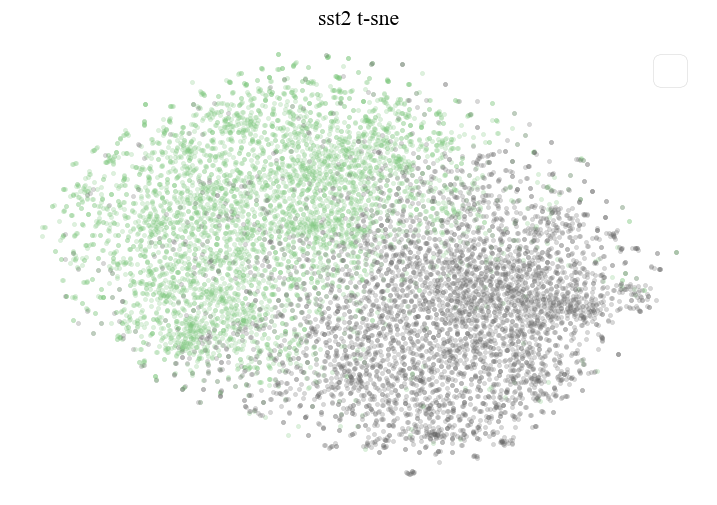

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

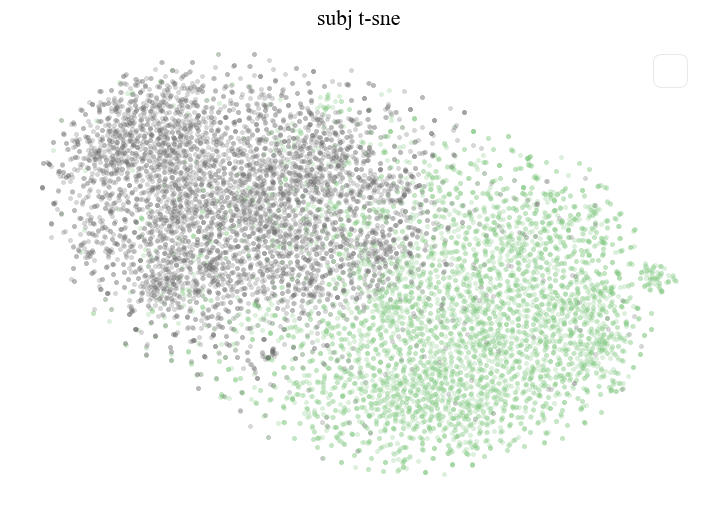

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

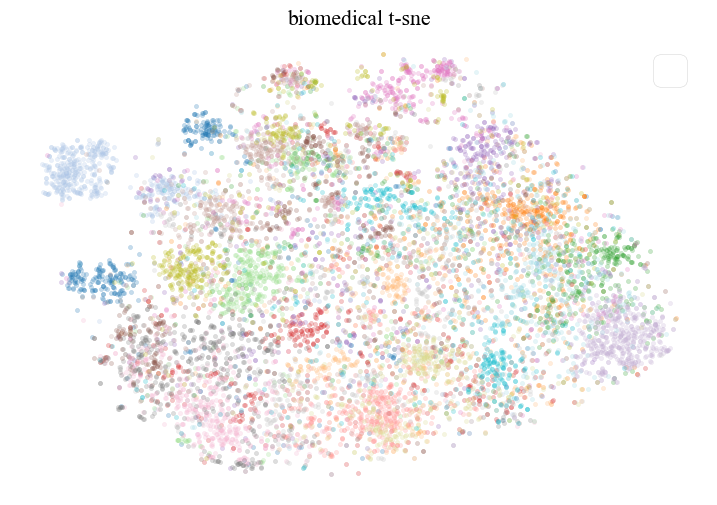

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

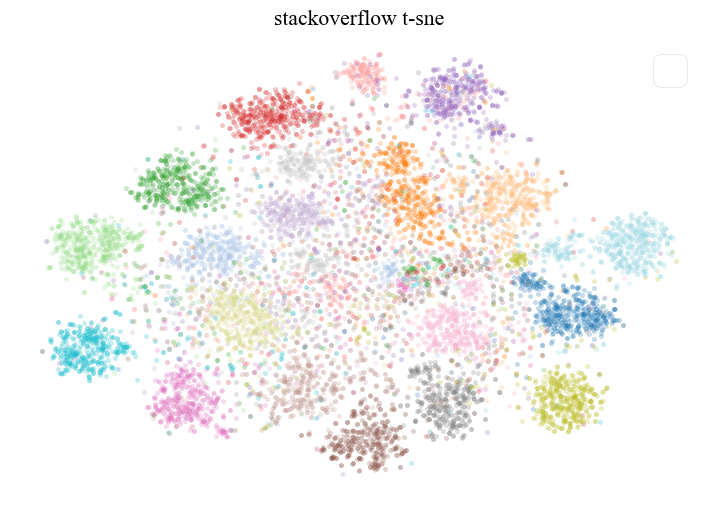

In [4]:
datasets = ['sst2', 'subj', 'biomedical', 'stackoverflow']
for model_name in ["roberta_large"]:
    for dataset in datasets: 
        embeddings, labels = get_train_and_test_embeddings(dataset, split="test" ,model_name=model_name)
        sample_num = min(10000, len(labels))
        chosen_idx = np.random.choice(len(labels), sample_num, replace=False)
        embeddings = embeddings[chosen_idx]
        labels = labels[chosen_idx]
        
        # model_pca = PCA(n_components=50)
        model = TSNE(n_components=2, random_state=0,)
        # model.fit(np.concatenate((embeddings, prompt_embeddings)))
        # embeddings = model_pca.fit_transform(embeddings)        
        embeddings_transformed = model.fit_transform(embeddings)
        do_plot(embeddings_transformed, labels=labels, anchors=None, 
            title=f'{dataset} t-sne', show_centers=False, show_axis=False, show_title=True, show_legend=True, dataset=dataset, fig_format='png', model_name=model_name)

### 5 datasets with different models

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

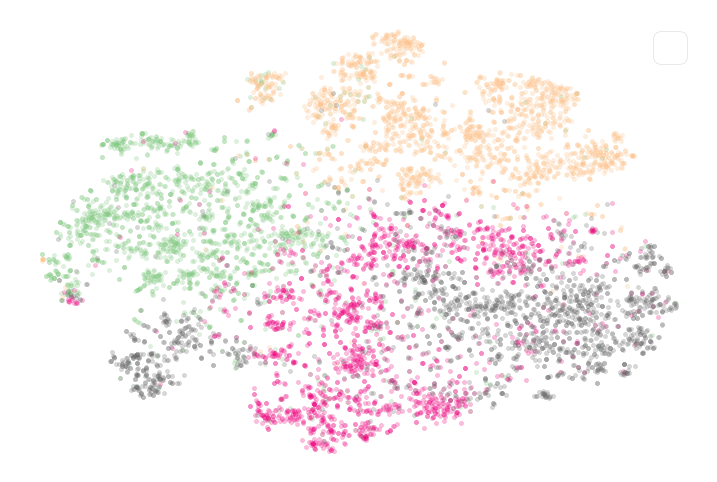

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

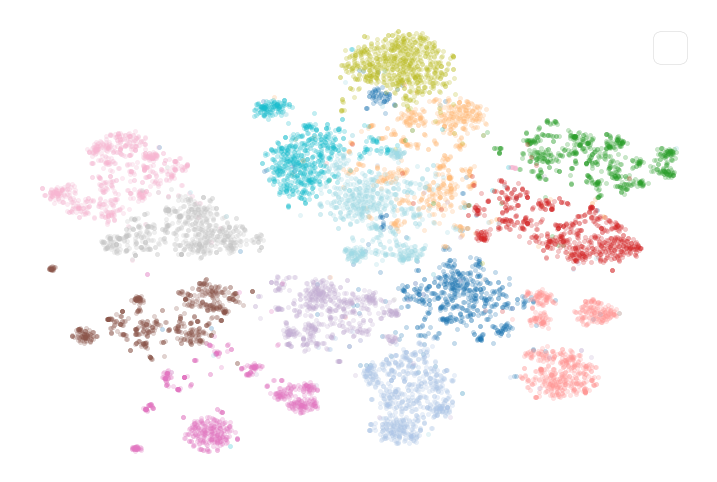

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

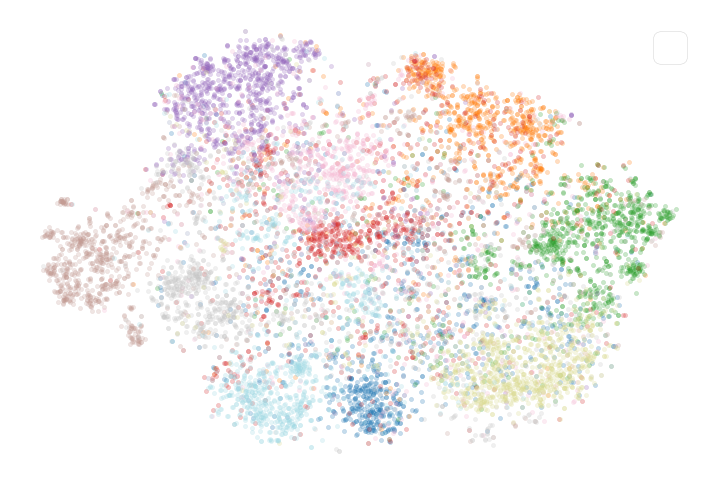

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

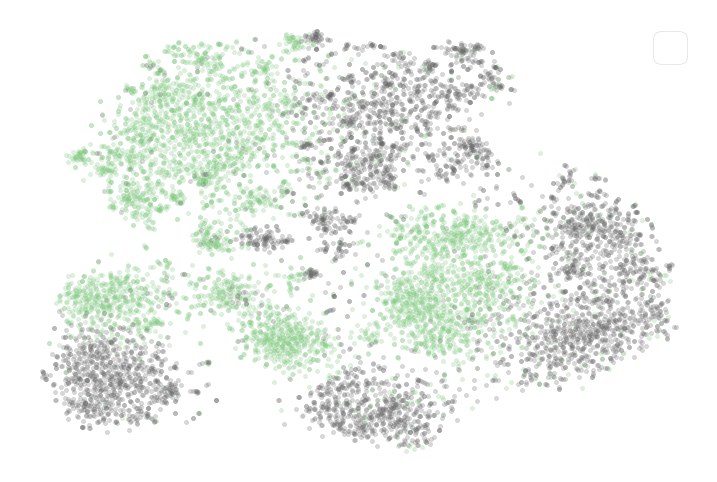

/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yufei/anaconda3/envs/prompt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1040x715 with 0 Axes>

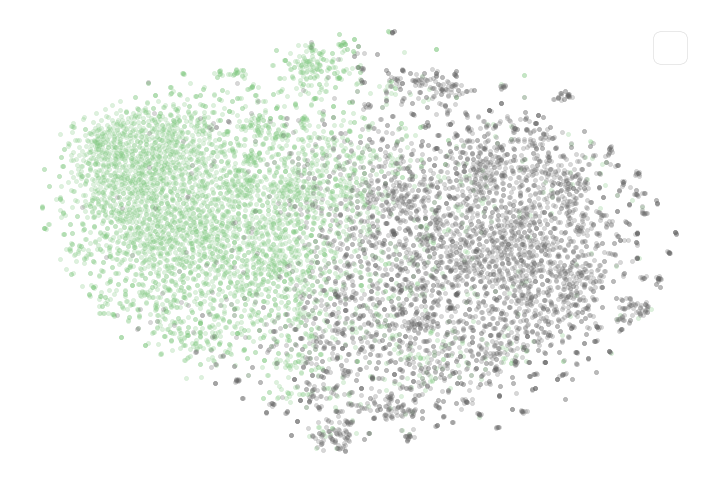

In [5]:
datasets = ["agnews", 'dbpedia', "yahoo", "amazon", "imdb"]
for model_name in ["roberta_large"]: # , 'roberta_large_vanilla', 'roberta_large_sentence']:
    for dataset in datasets: 
        embeddings, labels = get_train_and_test_embeddings(dataset, split="test" ,model_name=model_name)
        sample_num = min(10000, len(labels))
        chosen_idx = np.random.choice(len(labels), sample_num, replace=False)
        embeddings = embeddings[chosen_idx]
        labels = labels[chosen_idx]
        
        # model_pca = PCA(n_components=50)
        model = TSNE(n_components=2, random_state=0,)
        # model.fit(np.concatenate((embeddings, prompt_embeddings)))
        # embeddings = model_pca.fit_transform(embeddings)        
        embeddings_transformed = model.fit_transform(embeddings)
        do_plot(embeddings_transformed, labels=labels, anchors=None, 
            title=f'{dataset} t-sne', show_centers=False, show_axis=False, show_title=False,show_legend=True, dataset=dataset, fig_format='png', model_name=model_name)

# Show data and anchors

<Figure size 748.8x514.8 with 0 Axes>

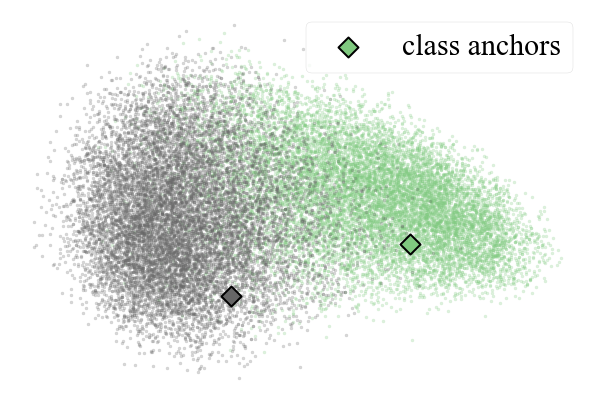

In [ ]:
# datasets = ["agnews", 'dbpedia', "yahoo", "amazon", "imdb"]
datasets = ["imdb"]
for model_name in ["roberta_large"]: #, 'roberta_large_vanilla', 'roberta_large_sentence']:
    for dataset in datasets:    
        embeddings, labels = get_train_and_test_embeddings(dataset, split="test" ,model_name=model_name)
        prompt_embeddings, prompt_labels = get_prompt_embeddings(dataset, model_name)
        cluster_centers = np.array([embeddings[labels==i].mean(axis=0) for i in range(np.max(labels)+1)])
        prompt_centers = np.array([prompt_embeddings[prompt_labels==i].mean(axis=0) for i in range(np.max(labels)+1)])
        model = PCA(n_components=2)
        # model.fit(np.concatenate((embeddings, prompt_embeddings)))
        model.fit(embeddings)
        embeddings_transformed = model.transform(embeddings)
        do_plot(embeddings_transformed, labels=labels, anchors=model.transform(prompt_centers), 
            title=f'{dataset} PCA', show_centers=True, show_axis=False, show_title=False,show_legend=True, dataset=dataset, fig_format='png', model_name=model_name)

# embeddings for different datasets

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 748.8x514.8 with 0 Axes>

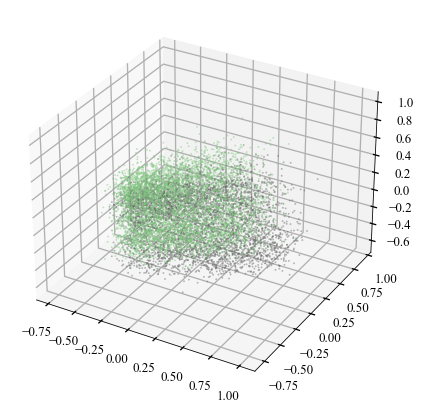

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 748.8x514.8 with 0 Axes>

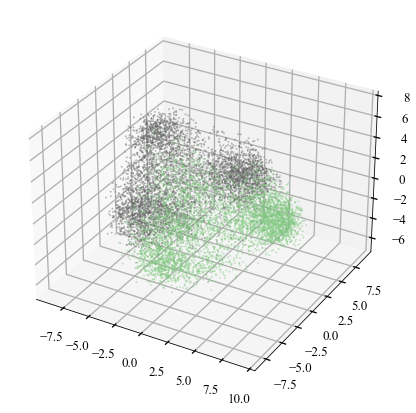

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 748.8x514.8 with 0 Axes>

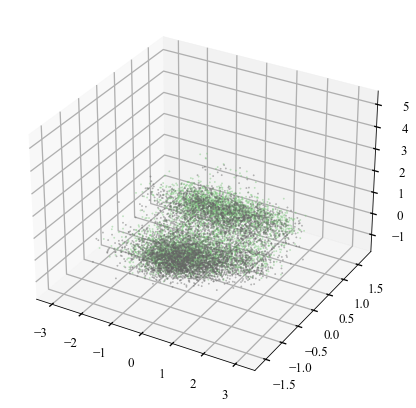

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 748.8x514.8 with 0 Axes>

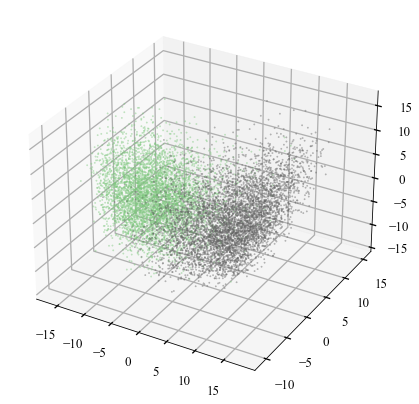

In [5]:
# datasets = ['agnews', 'dbpedia', 'yahoo', 'imdb']
# datasets = ["yahoo", "imdb"]
# datasets = ['agnews']
datasets = ['amazon']
for model_name in ["t5-3b","roberta_large","roberta_large_vanilla", "roberta_large_sentence"]:
    for dataset in datasets:    
        for dim in [3]:
            if dataset in ["agnews", "amazon"]:
                split="train"
            else:
                split="test"
            embeddings_raw, labels_raw = get_train_and_test_embeddings(dataset, split=split ,model_name=model_name)
            n_class = np.max(labels_raw)+1
            embeddings = []
            labels = []
            for label in range(n_class):
                embeddings_one_cls = embeddings_raw[labels_raw==label]
                labels_one_cls = labels_raw[labels_raw==label]
                selected_idxes = np.random.choice(len(labels_one_cls), 5000, replace=False)
                embeddings.extend(embeddings_one_cls[selected_idxes])
                labels.extend(labels_one_cls[selected_idxes])
            embeddings = np.array(embeddings)
            labels = np.array(labels)

            cluster_centers = np.array([embeddings[labels==i].mean(axis=0) for i in range(np.max(labels)+1)])

            model = PCA(n_components=dim)
            all_data_transformed = model.fit_transform(embeddings)
            cluster_centers = model.transform(cluster_centers)
            # if dim == 3:
            #     all_data_transformed = all_data_transformed[:,1:]
            #     cluster_centers = cluster_centers[:,1:]
            # do_plot(all_data_transformed, labels=labels, anchors=cluster_centers, title=f'{dataset} PCA',
            #     show_centers=True, show_axis=True, show_title=False, model_name=model_name, dataset=dataset, show_legend=False, fig_format='png')
            do_plot(all_data_transformed, labels=labels, anchors=cluster_centers, title=f'{dataset} PCA',
                show_centers=False, show_axis=True, show_title=False, model_name=model_name, dataset=dataset, show_legend=False, fig_format='png')

